# Initial Graphs

Graphing data for exploratory data analysis.

In [95]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [96]:
df = pd.read_csv('Data/national_csv/national_tes.csv')
df.head()

GEOID      place   state state_abbr                  county  \
0  20200001011  Anchorage  Alaska         AK  Anchorage Municipality   
1  20200001012  Anchorage  Alaska         AK  Anchorage Municipality   
2  20200001021  Anchorage  Alaska         AK  Anchorage Municipality   
3  20200001022  Anchorage  Alaska         AK  Anchorage Municipality   
4  20200001023  Anchorage  Alaska         AK  Anchorage Municipality   

                   ua_name  ua_pop                            congressio  \
0  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
1  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
2  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
3  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
4  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   

   cbg_pop  acs_pop  ...  linguistic  lingnorm health_nor  temp_diff  \
0     3234   3055.0  ...    0.000379  0.026925   0.412103      -1.44   
1     1787   2545.0  ...    0.000379  0.026925   0.412103      -5.19   
2      669    595.0  ...    0.000000  0.000000   0.761111      -4.47   
3     1066   1888.0  ...    0.000000  0.000000   0.761111       0.41   
4     1509   1969.0  ...    0.000000  0.000000   0.761111       0.13   

   temp_norm  tes  tesctyscor  holc_grade  child_perc  seniorperc  
0   0.208102   73        76.0         NaN    0.334206    0.115876  
1   0.000000   74        76.0         NaN    0.156385    0.130452  
2   0.039956   69        76.0         NaN    0.235294    0.312605  
3   0.310766   68        76.0         NaN    0.256356    0.147246  
4   0.295228   71        76.0         NaN    0.178771    0.139665  

[5 rows x 36 columns]

In [97]:
df.shape

(197505, 36)

In [98]:
import geopandas as gdf

entry = df['state'].value_counts()
entries = pd.DataFrame(entry).reset_index()
entries = entries.rename(columns={"state": "Amount", "index": "State"}, errors="raise")

In [99]:
import plotly.express as px

state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

entries['State Abbreviation'] = entries['State'].map(state_mapping)

fig = px.choropleth(
    entries,
    locations='State Abbreviation',
    locationmode='USA-states',
    color='Amount',
    scope='usa',
    title='Amount of Data per State',
    color_continuous_scale='YlOrRd',
)

fig.update_geos(fitbounds="locations")

fig.show()

## Missing Data

The tree canopy and tc_gap columns are mostly NAs so they can be dropped.

In [100]:
# The -1.0 values are also null values, so we will replace them with NaN 
df = df.replace(-1.0, np.nan) 

In [101]:
df.isnull().sum()

GEOID              0
place          13678
state              0
state_abbr         0
county             0
ua_name            0
ua_pop             0
congressio         0
cbg_pop            0
acs_pop            0
land_area          0
biome              0
cnpysource         0
tc_goal            0
treecanopy    194662
tc_gap        194662
priority_i         0
pctpoc             0
pctpocnorm         0
pctpov             0
pctpovnorm         0
unemplrate         0
unemplnorm         0
dep_ratio          0
dep_perc           0
depratnorm         0
linguistic         0
lingnorm           0
health_nor         0
temp_diff        135
temp_norm          0
tes                0
tesctyscor     13672
holc_grade    153338
child_perc         0
seniorperc         0
dtype: int64

Text(0.5, 1.0, 'Number of missing values in each column')

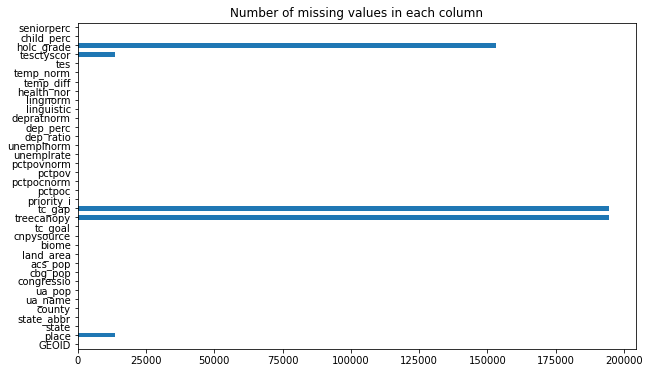

In [102]:
# Make a bar chart of the number of missing values in each column 
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind="barh")
plt.title("Number of missing values in each column")

In [103]:
# Find which columns are missing the most data 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing

temp_diff        135
tesctyscor     13672
place          13678
holc_grade    153338
treecanopy    194662
tc_gap        194662
dtype: int64

Text(0.5, 1.0, 'Number of missing values in each column')

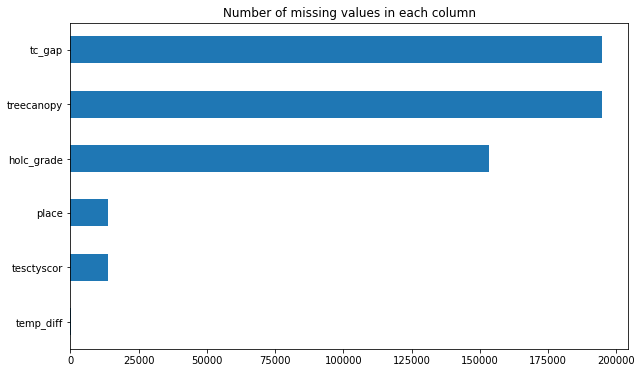

In [104]:
# make a bar chart of missing 
plt.figure(figsize=(10, 6))
missing.plot(kind="barh")
plt.title("Number of missing values in each column")

In [105]:
# Drop tc_gap and treecanopy 
df = df.drop(['tc_gap', 'treecanopy'], axis=1)

In [106]:
df = df.drop(columns =['place', 'state', 'state_abbr','county', 'ua_name', 'congressio','cnpysource','holc_grade', 'tesctyscor' ])

In [107]:
df.isnull().sum()

GEOID           0
ua_pop          0
cbg_pop         0
acs_pop         0
land_area       0
biome           0
tc_goal         0
priority_i      0
pctpoc          0
pctpocnorm      0
pctpov          0
pctpovnorm      0
unemplrate      0
unemplnorm      0
dep_ratio       0
dep_perc        0
depratnorm      0
linguistic      0
lingnorm        0
health_nor      0
temp_diff     135
temp_norm       0
tes             0
child_perc      0
seniorperc      0
dtype: int64

In [108]:
df.head()

GEOID  ua_pop  cbg_pop  acs_pop  land_area   biome  tc_goal  \
0  20200001011   29561     3234   3055.0   8.209274  Forest      0.5   
1  20200001012   29561     1787   2545.0   6.140281  Forest      0.5   
2  20200001021   29561      669    595.0   1.519179  Forest      0.5   
3  20200001022   29561     1066   1888.0   2.764926  Forest      0.5   
4  20200001023   29561     1509   1969.0   4.529689  Forest      0.5   

   priority_i    pctpoc  pctpocnorm  ...  dep_perc  depratnorm  linguistic  \
0    0.345039  0.223568    0.515355  ...  0.450082    0.621153    0.000379   
1    0.401266  0.176817    0.404247  ...  0.286837    0.220347    0.000379   
2    0.394139  0.006723    0.000000  ...  0.547899    1.000000    0.000000   
3    0.460517  0.261123    0.604608  ...  0.403602    0.484690    0.000000   
4    0.376254  0.080752    0.175937  ...  0.318436    0.282945    0.000000   

   lingnorm  health_nor  temp_diff  temp_norm  tes  child_perc  seniorperc  
0  0.026925    0.412103      -1.44   0.208102   73    0.334206    0.115876  
1  0.026925    0.412103      -5.19   0.000000   74    0.156385    0.130452  
2  0.000000    0.761111      -4.47   0.039956   69    0.235294    0.312605  
3  0.000000    0.761111       0.41   0.310766   68    0.256356    0.147246  
4  0.000000    0.761111       0.13   0.295228   71    0.178771    0.139665  

[5 rows x 25 columns]

In [109]:
df = df.drop(columns = 'GEOID')

In [110]:
df = df.drop(columns = ['pctpoc', 'pctpov', 'unemplrate', 'dep_ratio','dep_perc', 'linguistic', 'temp_diff'])

In [111]:
# Now check the missing values 
missing = df.isnull().sum() 
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing

Series([], dtype: int64)

In [112]:
# dividing data
numerical_features = df.drop(['biome', 'unemplnorm'], axis = 1)
categorical_features = df[['biome']]
df_y = df['unemplnorm']

## Numeric Data

              ua_pop   cbg_pop   acs_pop  land_area   tc_goal  priority_i  \
ua_pop      1.000000  0.101782  0.024745  -0.222599 -0.234146   -0.045694   
cbg_pop     0.101782  1.000000  0.811002   0.315855 -0.075616    0.002456   
acs_pop     0.024745  0.811002  1.000000   0.319095 -0.010045   -0.032150   
land_area  -0.222599  0.315855  0.319095   1.000000  0.242992   -0.190060   
tc_goal    -0.234146 -0.075616 -0.010045   0.242992  1.000000   -0.193259   
priority_i -0.045694  0.002456 -0.032150  -0.190060 -0.193259    1.000000   
pctpocnorm  0.245795  0.151198  0.092725  -0.201010 -0.248115    0.695811   
pctpovnorm -0.146515 -0.077053 -0.085488  -0.117603 -0.064469    0.768754   
depratnorm -0.125298 -0.042387 -0.003321   0.113008  0.088960    0.199107   
lingnorm   -0.074243  0.021331  0.003153  -0.072614 -0.107005    0.566701   
health_nor -0.222952 -0.134010 -0.126381  -0.081242 -0.019384    0.673903   
temp_norm   0.154572  0.031556 -0.059687  -0.313602 -0.300702    0.470566   

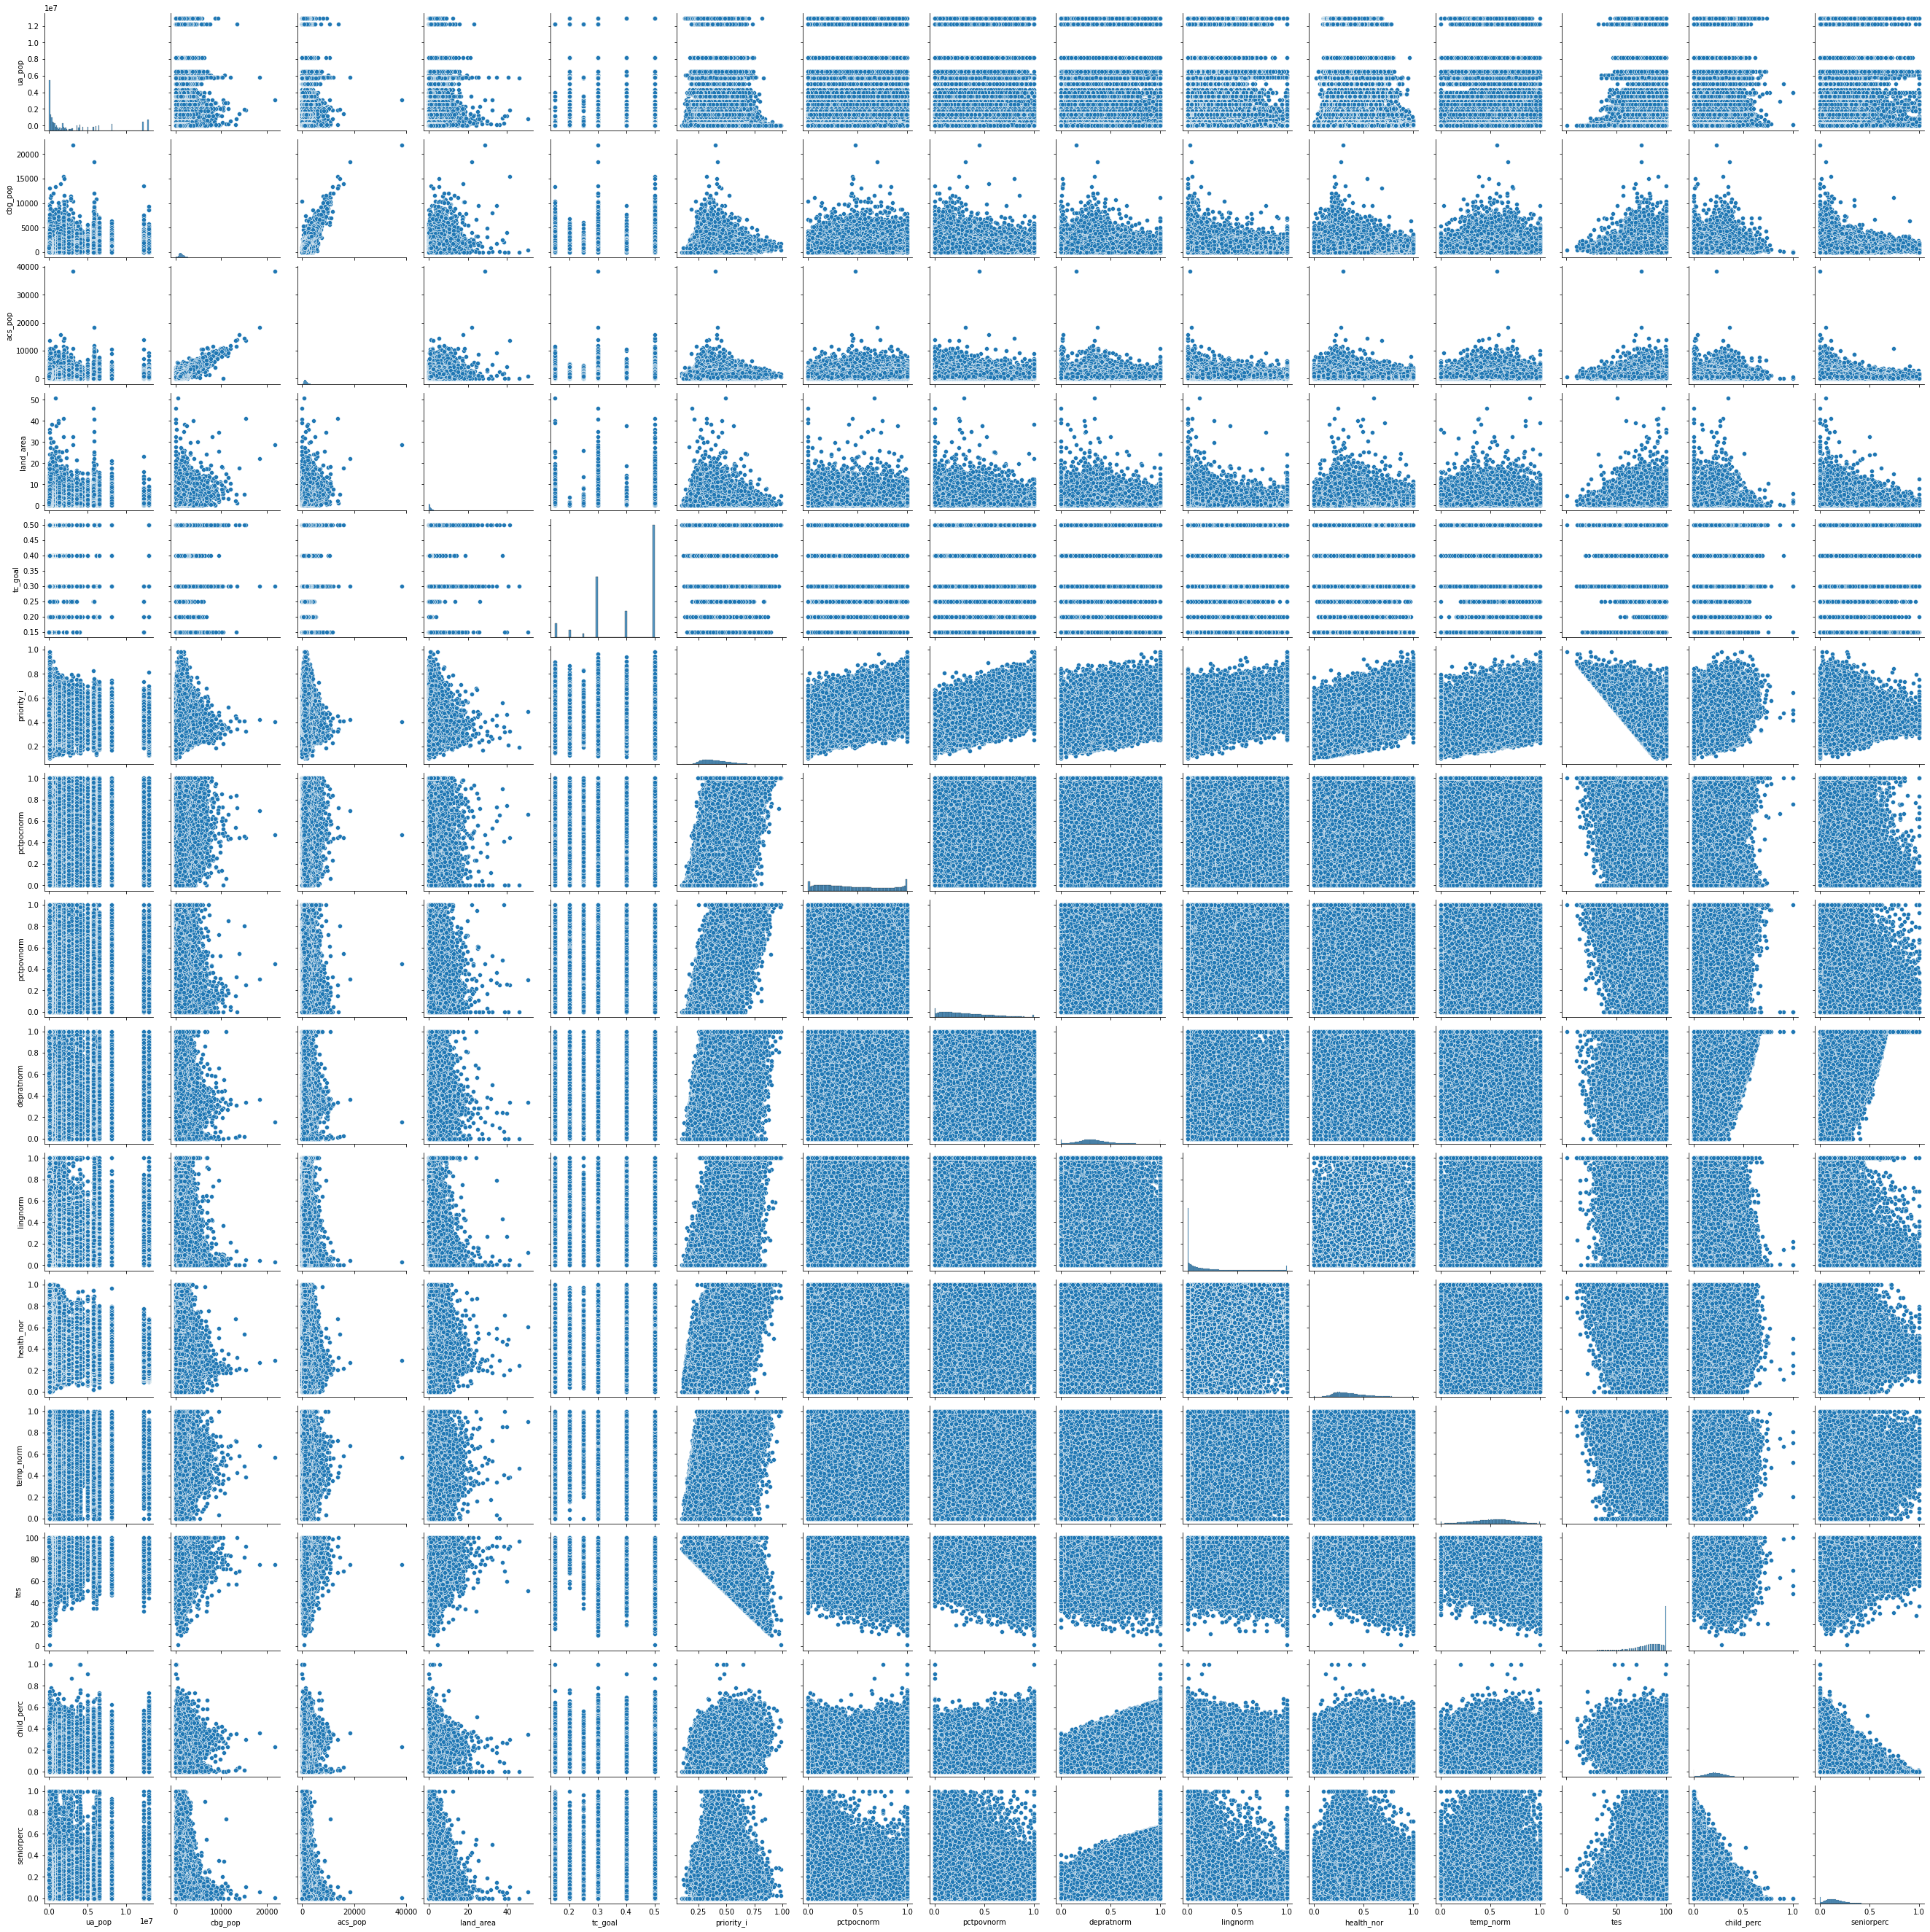

In [113]:
matrix = numerical_features.corr()
print(matrix)
sns.pairplot(numerical_features)

In [114]:
# remove  tc_gap and acs_pop based on correlations

df = df.drop(columns = ['acs_pop'])
numerical_features = numerical_features.drop(columns = ['acs_pop'])

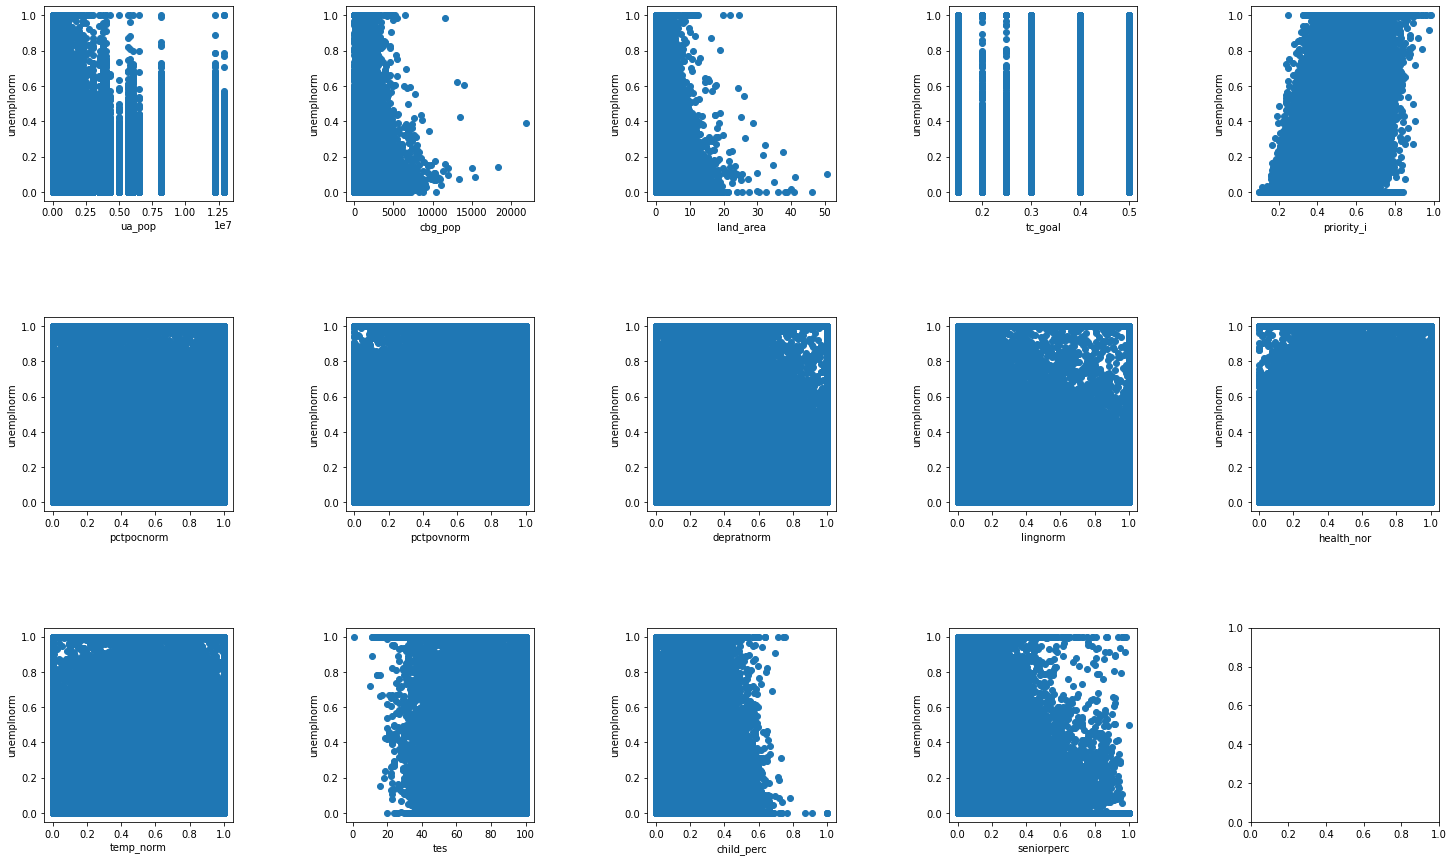

In [115]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    axarr[counter1, counter2].scatter(data = df, x = c, y = 'unemplnorm')
    axarr[counter1, counter2].set_xlabel(c)
    axarr[counter1, counter2].set_ylabel("unemplnorm")
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

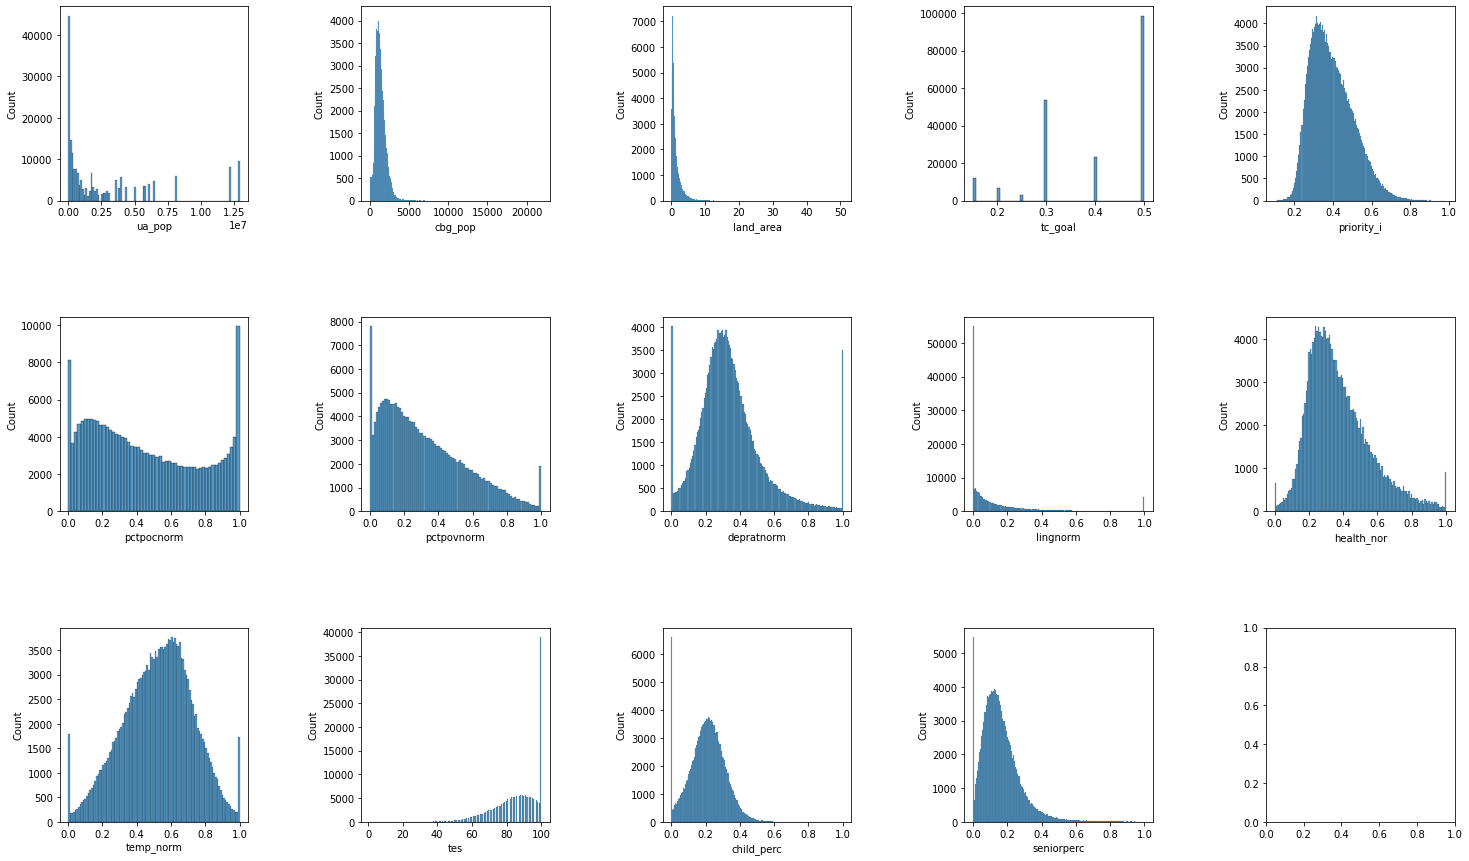

In [116]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    sns.histplot(ax = axarr[counter1, counter2], data = df, x = c)
    axarr[counter1, counter2].set_xlabel(c)
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

In [117]:
print(numerical_features['tc_goal'].value_counts())
# print(numerical_features['treecanopy'].value_counts())

# tc_goal should we make this a categorical feature - oridinal encode?
# treecanopy -1 means missing probably should drop

0.50    98616
0.30    53484
0.40    23316
0.15    12177
0.20     6651
0.25     3261
Name: tc_goal, dtype: int64


In [118]:
# df = df.drop(columns = 'treecanopy')
# numerical_features = numerical_features.drop(columns = 'treecanopy')

## Categorical Data

<AxesSubplot: xlabel='biome', ylabel='count'>

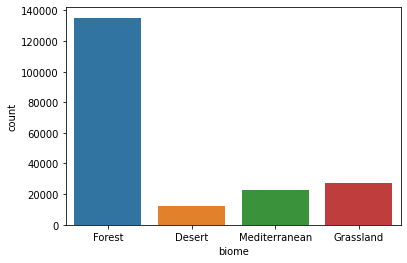

In [119]:
sns.countplot(data = df, x='biome')

<AxesSubplot: xlabel='unemplnorm', ylabel='biome'>

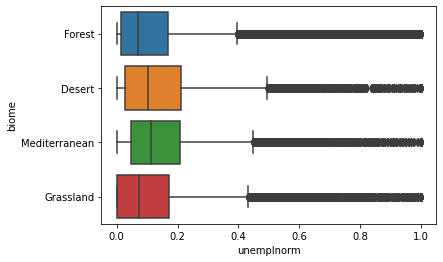

In [120]:
sns.boxplot(data=df, y='biome', x = 'unemplnorm')

<AxesSubplot: xlabel='unemplnorm', ylabel='Count'>

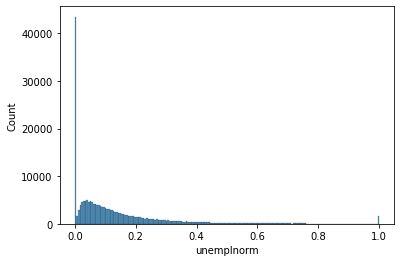

In [121]:
sns.histplot(data = df_y, x = df_y)

In [122]:
df_X = numerical_features + categorical_features
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y, 
                                                random_state=42,
                                                test_size = .2)